In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df = pd.read_csv('D:/Upgrad/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [7]:
df.shape

(9240, 37)

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [12]:
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


In [13]:
df.drop('prospect_id', axis = 1, inplace = True)

In [14]:
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


In [15]:
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

In [16]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

In [17]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [18]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [19]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [20]:
df.drop('country', axis = 1, inplace = True)

In [21]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

In [22]:
df.drop('course_selection_reason', axis = 1, inplace = True)

In [23]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [24]:
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [25]:
df.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [26]:
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [27]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [28]:
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [29]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [30]:
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [31]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [32]:
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [33]:
df.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [34]:
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

In [35]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [36]:
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [37]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [38]:
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [39]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [40]:
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [41]:
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [42]:
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [43]:
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



In [44]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

In [45]:
df.lead_number = df.lead_number.astype('object')

In [46]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

In [47]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


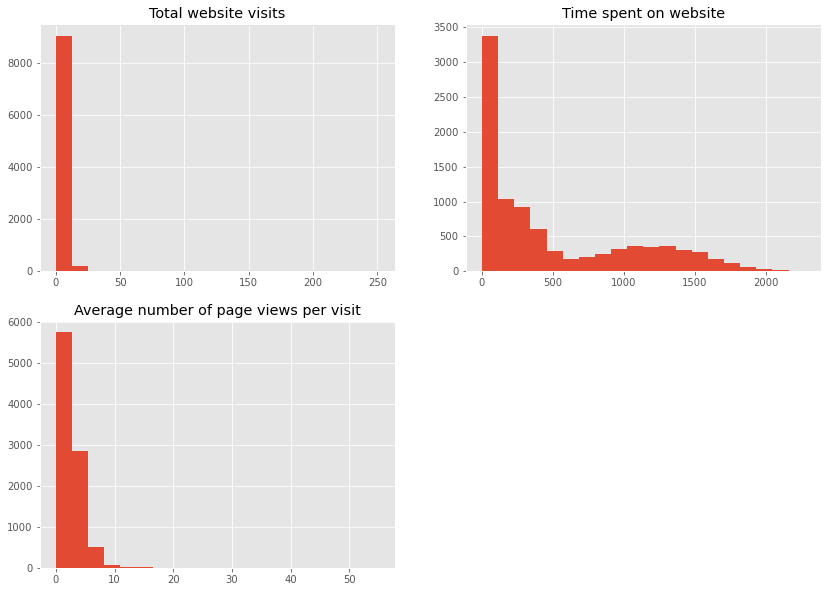

In [49]:
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

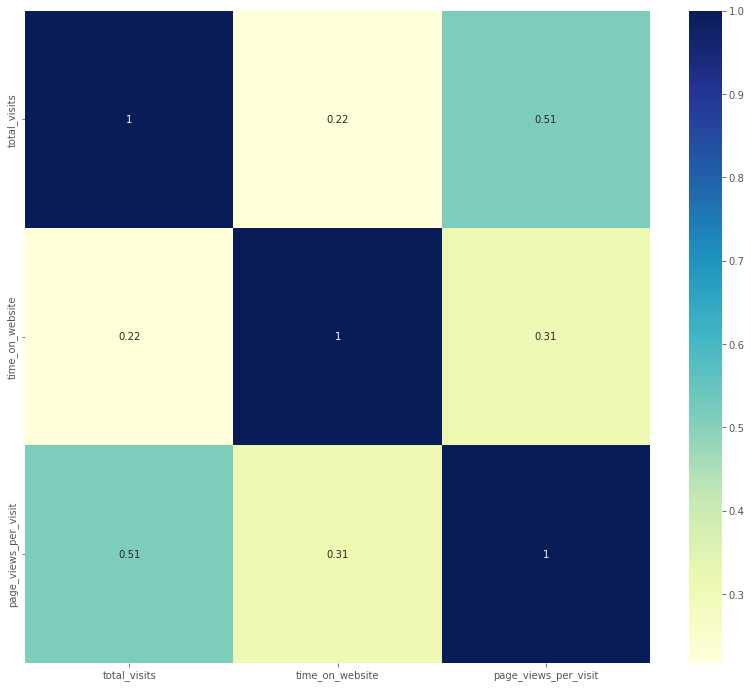

In [50]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

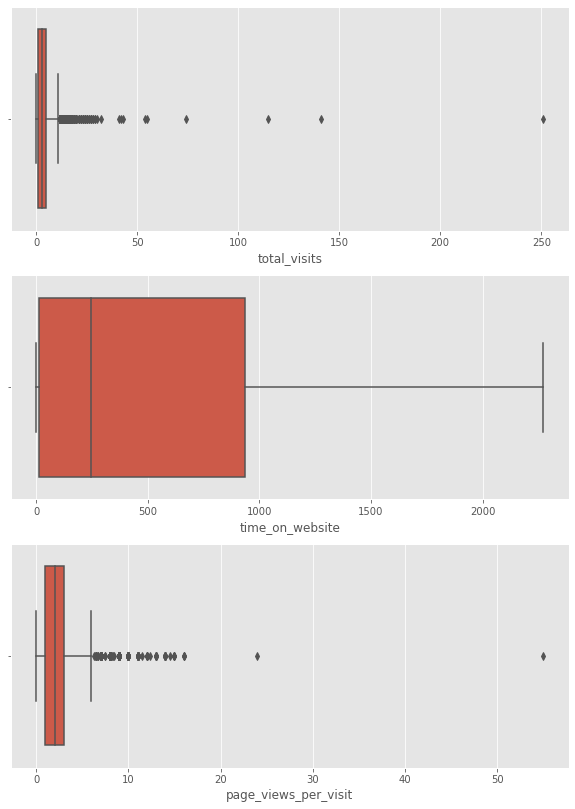

In [51]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

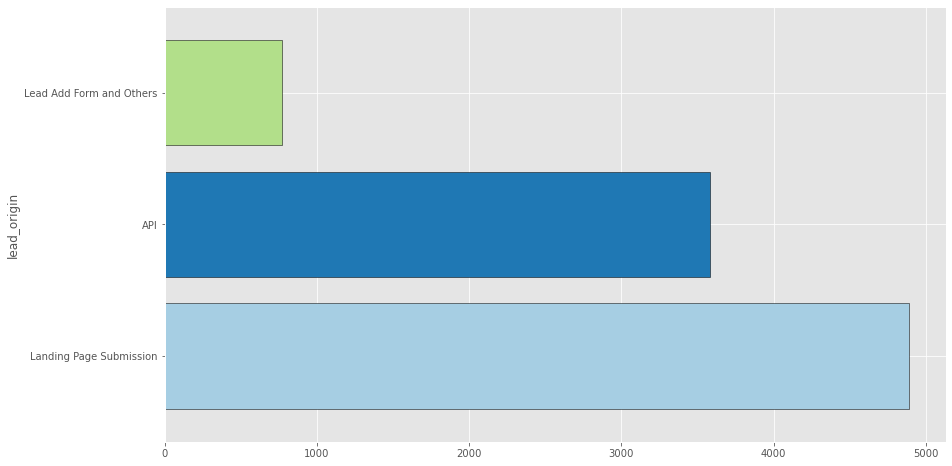

In [52]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [53]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,No


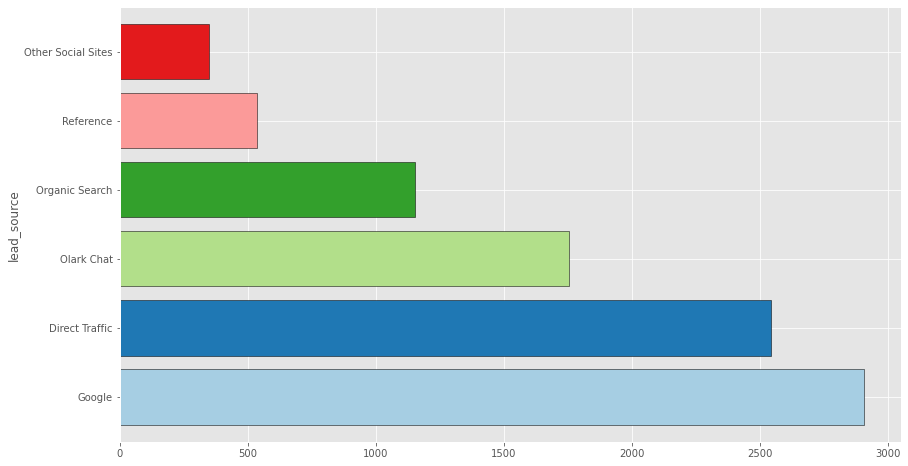

In [54]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

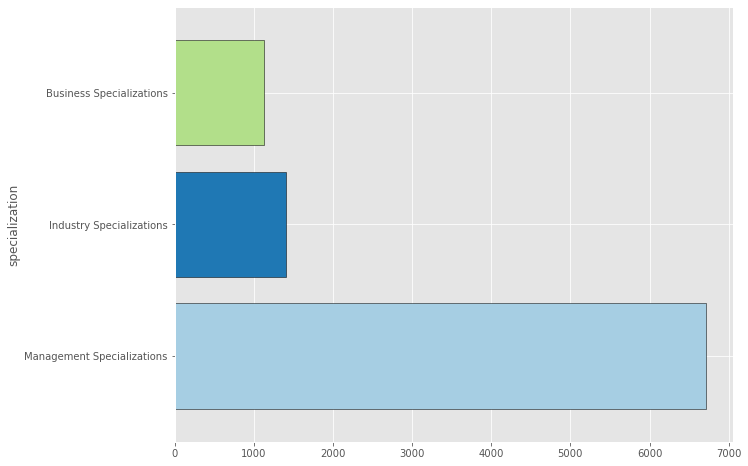

In [55]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

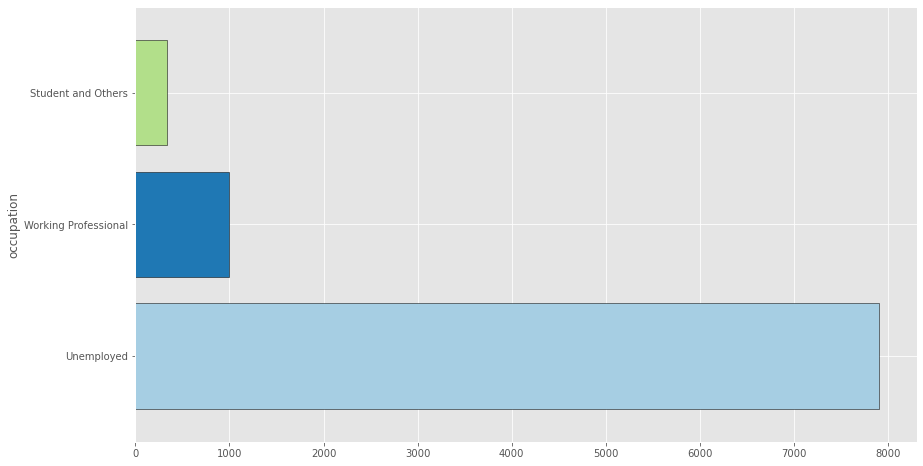

In [56]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

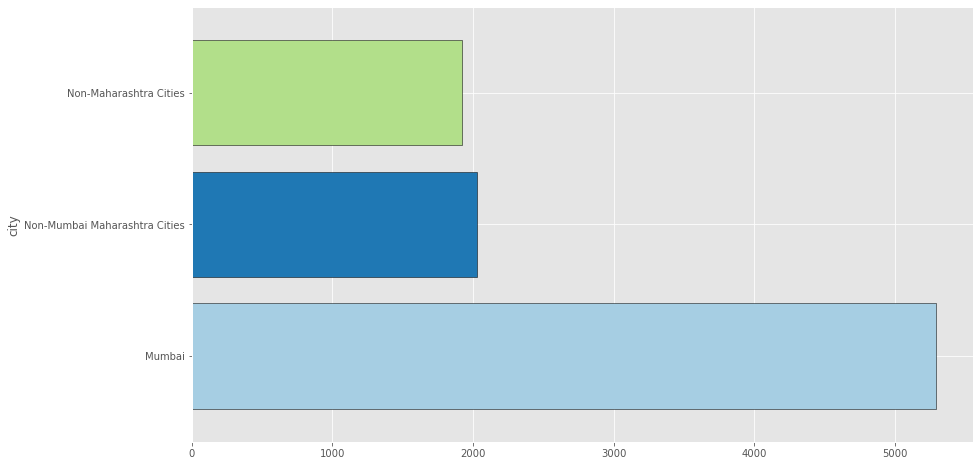

In [57]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

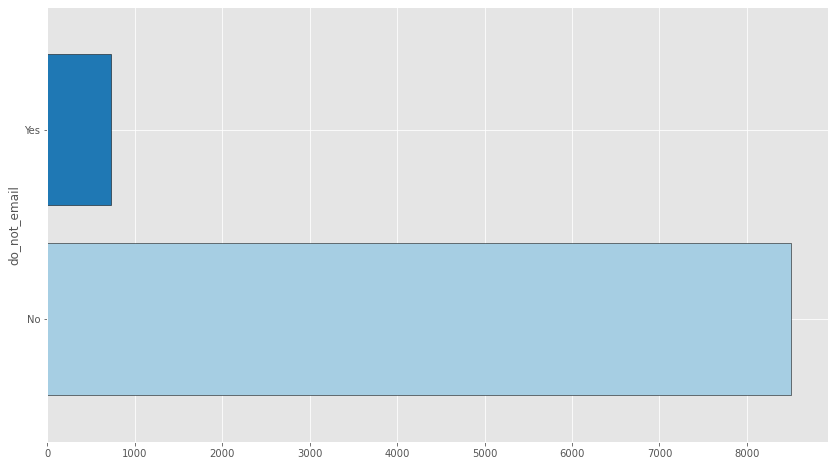

In [58]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [59]:
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [60]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.50,Business Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


In [61]:
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [62]:
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [63]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [64]:
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

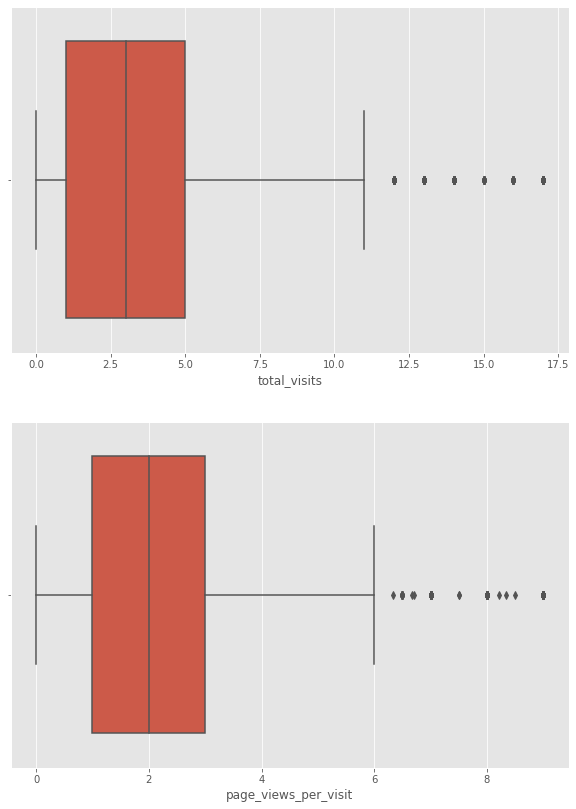

In [65]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

In [66]:
X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [67]:
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.21,0.01,-0.50,1,1,0,0,0,0,0,0,0,0,1,0,1,0
3516,0,0.51,-0.69,0.09,0,0,0,0,1,0,0,0,0,0,1,0,0,1
8105,0,0.51,1.37,1.36,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [70]:
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

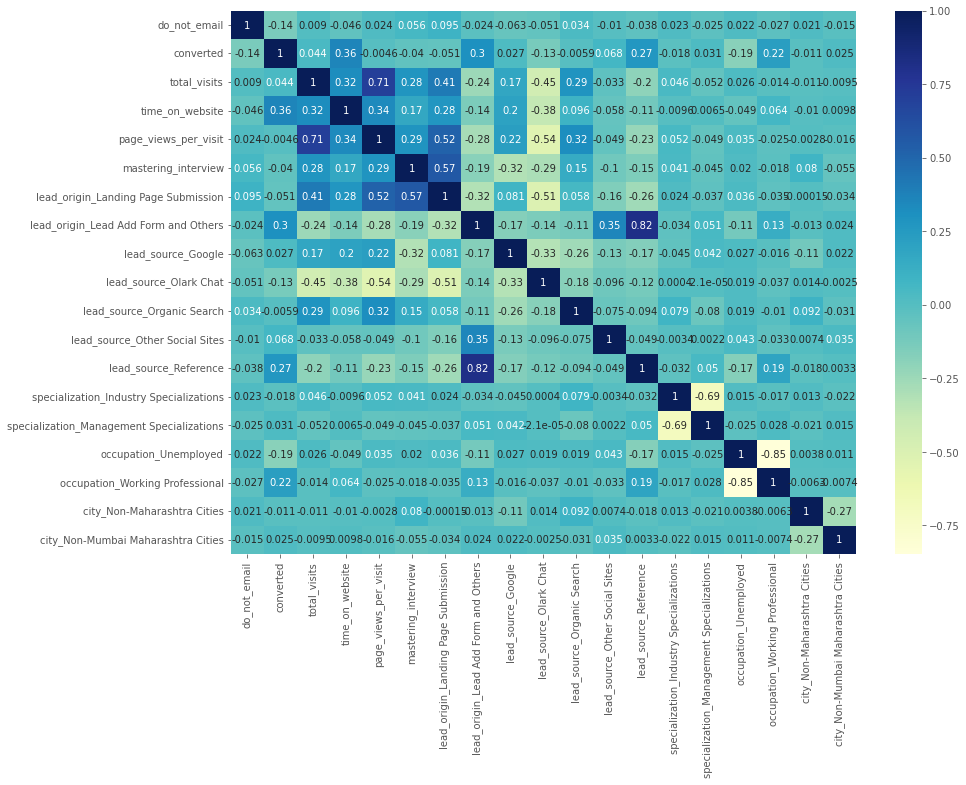

In [71]:
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [72]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

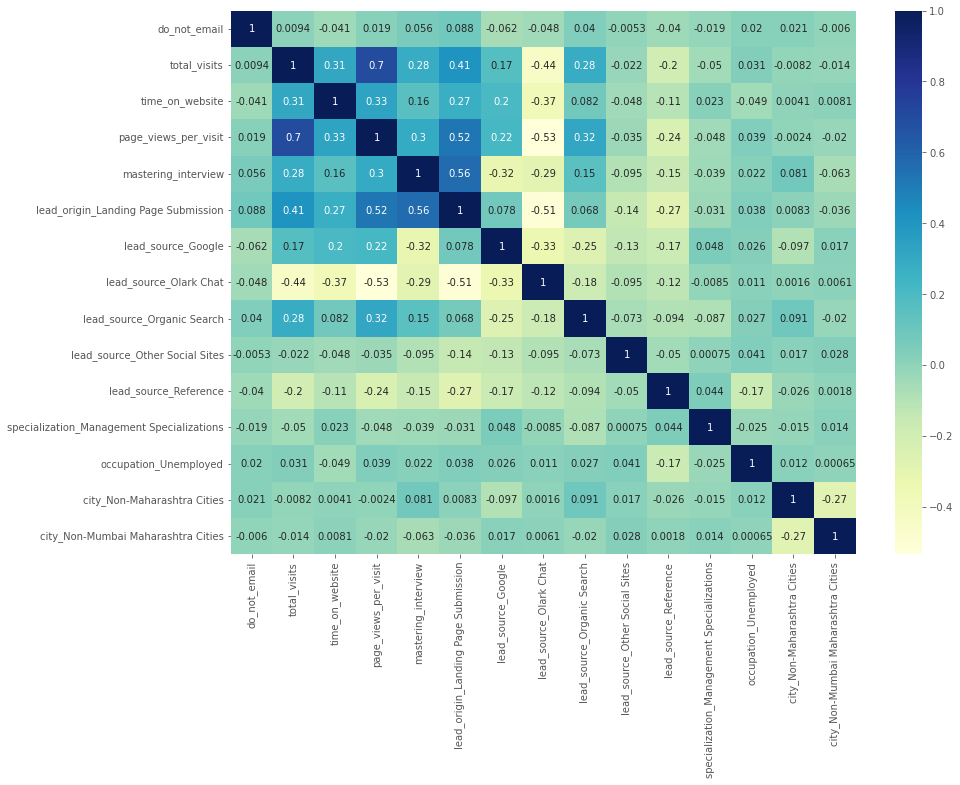

In [73]:
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [78]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.8
Date:                Wed, 13 Dec 2023   Deviance:                       6591.7
Time:                        21:17:12   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2989      0.147     -2.035      0.042      -0.587      -0.011
do_not_email                                 -1.2313      0.145     -8.520      0.000      -1.515      -0.948
total_visits                                  0.1439      0.042      3.439      0.001       0.062       0.226
time_on_website                               1.0387      0.036     29.188      0.000       0.969       1.108
page_views_per_visit                         -0.1836      0.048     -3.789      0.000      -0.279      -0.089
mastering_interview                          -0.0082      0.094     -0.088      0.930      -0.192       0.176
lead_origin_Landing Page Submission           0.0115      0.092      0.124      0.901      -0.170       0.193
lead_source_Google                            0.3592      0.101      3.574      0.000       0.162       0.556
lead_source_Olark Chat                        0.6632      0.137      4.846      0.000       0.395       0.931
lead_source_Organic Search                    0.2271      0.116      1.958      0.050      -0.000       0.454
lead_source_Other Social Sites                1.6205      0.175      9.250      0.000       1.277       1.964
lead_source_Reference                         3.9532      0.221     17.870      0.000       3.520       4.387
specialization_Management Specializations     0.0382      0.069      0.552      0.581      -0.098       0.174
occupation_Unemployed                        -0.9356      0.085    -10.956      0.000      -1.103      -0.768
city_Non-Maharashtra Cities                   0.0961      0.078      1.230      0.219      -0.057       0.249
city_Non-Mumbai Maharashtra Cities            0.1197      0.076      1.573      0.116      -0.029       0.269
=============================================================================================================
"""

In [81]:
import statsmodels.api as sm

In [86]:
from sklearn.linear_model import LogisticRegression

#Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
#rfe = RFE(logreg, 15)    
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [87]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [107]:
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data


[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [108]:
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['do_not_email', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other Social Sites', 'lead_source_Reference',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'city_Non-Maharashtra Cities', 'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [110]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.8
Date:                Thu, 14 Dec 2023   Deviance:                       6591.7
Time:                        16:39:21   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2989      0.147     -2.035      0.042      -0.587      -0.011
do_not_email                                 -1.2313      0.145     -8.520      0.000      -1.515      -0.948
total_visits                                  0.1439      0.042      3.439      0.001       0.062       0.226
time_on_website                               1.0387      0.036     29.188      0.000       0.969       1.108
page_views_per_visit                         -0.1836      0.048     -3.789      0.000      -0.279      -0.089
mastering_interview                          -0.0082      0.094     -0.088      0.930      -0.192       0.176
lead_origin_Landing Page Submission           0.0115      0.092      0.124      0.901      -0.170       0.193
lead_source_Google                            0.3592      0.101      3.574      0.000       0.162       0.556
lead_source_Olark Chat                        0.6632      0.137      4.846      0.000       0.395       0.931
lead_source_Organic Search                    0.2271      0.116      1.958      0.050      -0.000       0.454
lead_source_Other Social Sites                1.6205      0.175      9.250      0.000       1.277       1.964
lead_source_Reference                         3.9532      0.221     17.870      0.000       3.520       4.387
specialization_Management Specializations     0.0382      0.069      0.552      0.581      -0.098       0.174
occupation_Unemployed                        -0.9356      0.085    -10.956      0.000      -1.103      -0.768
city_Non-Maharashtra Cities                   0.0961      0.078      1.230      0.219      -0.057       0.249
city_Non-Mumbai Maharashtra Cities            0.1197      0.076      1.573      0.116      -0.029       0.269
=============================================================================================================
"""

In [111]:
rfe_support_col = rfe_support_col.drop('Lead Source_Referral Sites',1)

KeyError: "['Lead Source_Referral Sites'] not found in axis"

In [112]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.8
Date:                Thu, 14 Dec 2023   Deviance:                       6591.7
Time:                        16:40:07   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2989      0.147     -2.035      0.042      -0.587      -0.011
do_not_email                                 -1.2313      0.145     -8.520      0.000      -1.515      -0.948
total_visits                                  0.1439      0.042      3.439      0.001       0.062       0.226
time_on_website                               1.0387      0.036     29.188      0.000       0.969       1.108
page_views_per_visit                         -0.1836      0.048     -3.789      0.000      -0.279      -0.089
mastering_interview                          -0.0082      0.094     -0.088      0.930      -0.192       0.176
lead_origin_Landing Page Submission           0.0115      0.092      0.124      0.901      -0.170       0.193
lead_source_Google                            0.3592      0.101      3.574      0.000       0.162       0.556
lead_source_Olark Chat                        0.6632      0.137      4.846      0.000       0.395       0.931
lead_source_Organic Search                    0.2271      0.116      1.958      0.050      -0.000       0.454
lead_source_Other Social Sites                1.6205      0.175      9.250      0.000       1.277       1.964
lead_source_Reference                         3.9532      0.221     17.870      0.000       3.520       4.387
specialization_Management Specializations     0.0382      0.069      0.552      0.581      -0.098       0.174
occupation_Unemployed                        -0.9356      0.085    -10.956      0.000      -1.103      -0.768
city_Non-Maharashtra Cities                   0.0961      0.078      1.230      0.219      -0.057       0.249
city_Non-Mumbai Maharashtra Cities            0.1197      0.076      1.573      0.116      -0.029       0.269
=============================================================================================================
"""

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.24
5,lead_origin_Landing Page Submission,4.13
11,specialization_Management Specializations,3.28
4,mastering_interview,2.74
3,page_views_per_visit,2.57
7,lead_source_Olark Chat,2.42
6,lead_source_Google,2.40
1,total_visits,2.03
8,lead_source_Organic Search,1.46
13,city_Non-Maharashtra Cities,1.37


In [115]:
rfe_support_col = rfe_support_col.drop('Last Notable Activity_SMS Sent',1)

KeyError: "['Last Notable Activity_SMS Sent'] not found in axis"

In [116]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.8
Date:                Thu, 14 Dec 2023   Deviance:                       6591.7
Time:                        16:41:13   Pearson chi2:                 6.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2989      0.147     -2.035      0.042      -0.587      -0.011
do_not_email                                 -1.2313      0.145     -8.520      0.000      -1.515      -0.948
total_visits                                  0.1439      0.042      3.439      0.001       0.062       0.226
time_on_website                               1.0387      0.036     29.188      0.000       0.969       1.108
page_views_per_visit                         -0.1836      0.048     -3.789      0.000      -0.279      -0.089
mastering_interview                          -0.0082      0.094     -0.088      0.930      -0.192       0.176
lead_origin_Landing Page Submission           0.0115      0.092      0.124      0.901      -0.170       0.193
lead_source_Google                            0.3592      0.101      3.574      0.000       0.162       0.556
lead_source_Olark Chat                        0.6632      0.137      4.846      0.000       0.395       0.931
lead_source_Organic Search                    0.2271      0.116      1.958      0.050      -0.000       0.454
lead_source_Other Social Sites                1.6205      0.175      9.250      0.000       1.277       1.964
lead_source_Reference                         3.9532      0.221     17.870      0.000       3.520       4.387
specialization_Management Specializations     0.0382      0.069      0.552      0.581      -0.098       0.174
occupation_Unemployed                        -0.9356      0.085    -10.956      0.000      -1.103      -0.768
city_Non-Maharashtra Cities                   0.0961      0.078      1.230      0.219      -0.057       0.249
city_Non-Mumbai Maharashtra Cities            0.1197      0.076      1.573      0.116      -0.029       0.269
=============================================================================================================
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.24
5,lead_origin_Landing Page Submission,4.13
11,specialization_Management Specializations,3.28
4,mastering_interview,2.74
3,page_views_per_visit,2.57
7,lead_source_Olark Chat,2.42
6,lead_source_Google,2.40
1,total_visits,2.03
8,lead_source_Organic Search,1.46
13,city_Non-Maharashtra Cities,1.37


In [118]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.20
6795   0.27
3516   0.25
8105   0.59
3934   0.22
4844   0.85
3297   0.17
8071   0.97
987    0.75
7423   0.79
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20049431, 0.26753117, 0.24731159, 0.59324593, 0.21635061,
       0.84643475, 0.1692721 , 0.971185  , 0.74530562, 0.79144563])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.20,1871
1,0,0.27,6795
2,0,0.25,3516
3,0,0.59,8105
4,0,0.22,3934


In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.20,1871,0
1,0,0.27,6795,0
2,0,0.25,3516,0
3,0,0.59,8105,1
4,0,0.22,3934,0


In [122]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3480  522]
 [1023 1443]]


In [123]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7611317254174397


In [124]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0]

In [125]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  1443
True negatives is  3480
False positives is  522
False negatives is  1023


In [126]:
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  58.52 %


In [127]:
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  86.96 %


In [128]:
print(FP/ float(TN+FP))

0.13043478260869565


In [129]:
print (TP / float(TP+FP))

0.7343511450381679


In [130]:
print (TN / float(TN+ FN))

0.7728181212524984


In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

<Figure size 1080x1080 with 0 Axes>

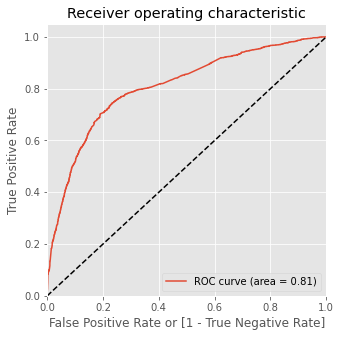

In [133]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

In [134]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.20,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.27,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.25,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.59,8105,1,1,1,1,1,1,1,0,0,0,0
4,0,0.22,3934,0,1,1,1,0,0,0,0,0,0,0


In [135]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.43   0.99   0.08
0.20  0.20      0.60   0.89   0.42
0.30  0.30      0.75   0.77   0.74
0.40  0.40      0.77   0.69   0.82
0.50  0.50      0.76   0.59   0.87
0.60  0.60      0.75   0.50   0.91
0.70  0.70      0.72   0.36   0.95
0.80  0.80      0.69   0.24   0.98
0.90  0.90      0.65   0.10   0.99


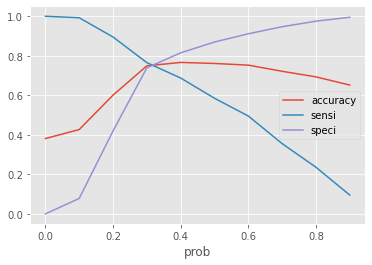

In [136]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [137]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.20,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.27,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.25,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.59,8105,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.22,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [138]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.20,1871,0,20
1,0,0.27,6795,0,27
2,0,0.25,3516,0,25
3,0,0.59,8105,1,59
4,0,0.22,3934,0,22


In [139]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7490723562152134

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2958, 1044],
       [ 579, 1887]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
TP / float(TP+FN)

0.7652068126520681

In [143]:
TN / float(TN+FP)

0.7391304347826086

In [144]:
print(FP/ float(TN+FP))

0.2608695652173913


In [145]:
print (TP / float(TP+FP))

0.6438075742067554


In [146]:
print (TN / float(TN+ FN))

0.8363019508057676


In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2958, 1044],
       [ 579, 1887]], dtype=int64)

In [148]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6438075742067554

In [149]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7652068126520681

In [150]:
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6438075742067554

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7652068126520681

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

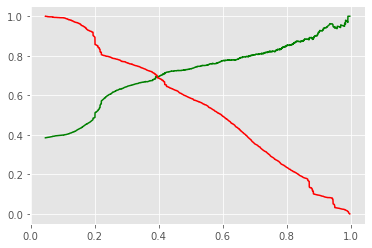

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [156]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
4269,-0.30,8,0.93,2.84,-0.68,0,0,0,0,0,0,1,1,0,0
2376,-0.30,0,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1
7766,-0.30,5,-0.79,1.33,-0.68,0,1,0,0,0,0,1,0,0,1
9199,-0.30,0,-0.90,-1.18,-0.68,0,0,1,0,0,0,1,1,0,0
4359,-0.30,0,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1


In [157]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
4269,-0.30,8,0.93,2.84,-0.68,0,0,0,0,0,0,1,1,0,0
2376,-0.30,0,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1
7766,-0.30,5,-0.79,1.33,-0.68,0,1,0,0,0,0,1,0,0,1
9199,-0.30,0,-0.90,-1.18,-0.68,0,0,1,0,0,0,1,1,0,0
4359,-0.30,0,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1


In [158]:
X_test_sm = sm.add_constant(X_test)

In [159]:
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

4269   0.68
2376   0.93
7766   0.56
9199   0.29
4359   0.93
9186   0.59
1631   0.75
8963   0.41
8007   0.41
5324   0.36
dtype: float64

In [161]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
y_pred_1.head()

,0
4269,0.68
2376,0.93
7766,0.56
9199,0.29
4359,0.93


In [163]:
y_test_df = pd.DataFrame(y_test)

In [164]:
y_test_df['Prospect ID'] = y_test_df.index

In [165]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

,converted,Prospect ID,0
0,1,4269,0.68
1,1,2376,0.93
2,1,7766,0.56
3,0,9199,0.29
4,1,4359,0.93


In [168]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [169]:
y_pred_final.head()

,converted,Prospect ID,Converted_prob
0,1,4269,0.68
1,1,2376,0.93
2,1,7766,0.56
3,0,9199,0.29
4,1,4359,0.93


In [170]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

KeyError: "['Converted'] not in index"

In [171]:
y_pred_final.head()

,converted,Prospect ID,Converted_prob
0,1,4269,0.68
1,1,2376,0.93
2,1,7766,0.56
3,0,9199,0.29
4,1,4359,0.93


In [172]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [173]:
y_pred_final.head()

,converted,Prospect ID,Converted_prob,final_Predicted
0,1,4269,0.68,1
1,1,2376,0.93,1
2,1,7766,0.56,1
3,0,9199,0.29,0
4,1,4359,0.93,1


In [174]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

AttributeError: 'DataFrame' object has no attribute 'Converted'

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

AttributeError: 'DataFrame' object has no attribute 'Converted'

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
TP / float(TP+FN)

0.7652068126520681

In [178]:
TN / float(TN+FP)

0.7391304347826086

In [179]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

AttributeError: 'DataFrame' object has no attribute 'Converted'

In [180]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

AttributeError: 'DataFrame' object has no attribute 'Converted'

In [181]:
df.head(1)

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0


KeyError: 'Do Not Email'

KeyError: 'Do Not Call'

KeyError: "['Do Not Call'] not found in axis"